In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [5]:
rng = np.random.RandomState(0)
x = np.linspace(0, 20, 600)
y = np.cumsum(rng.randn(600, 7), 0)

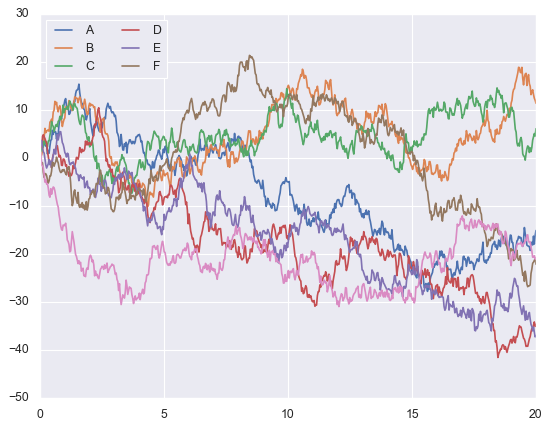

In [6]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [7]:
data = np.random.multivariate_normal([0, 0], [[6, 3], [3, 3]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

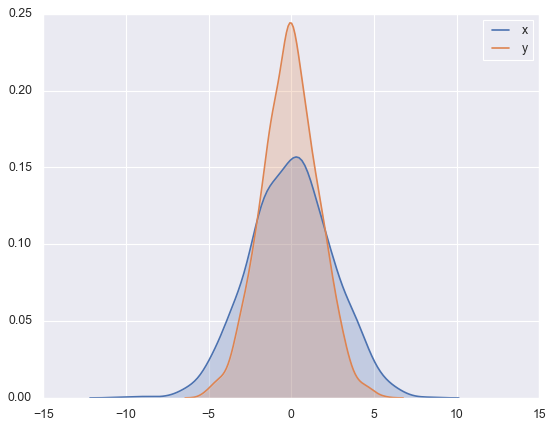

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

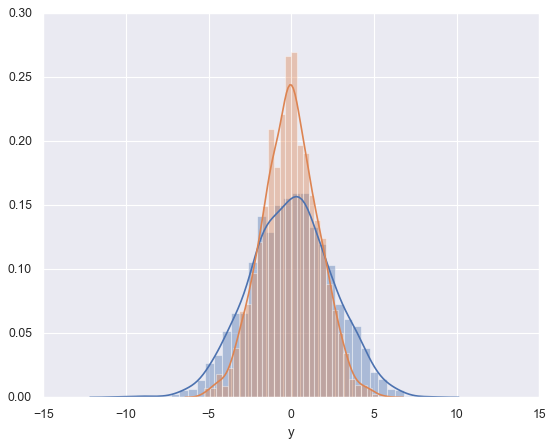

In [9]:
sns.distplot(data['x'])
sns.distplot(data['y']);

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


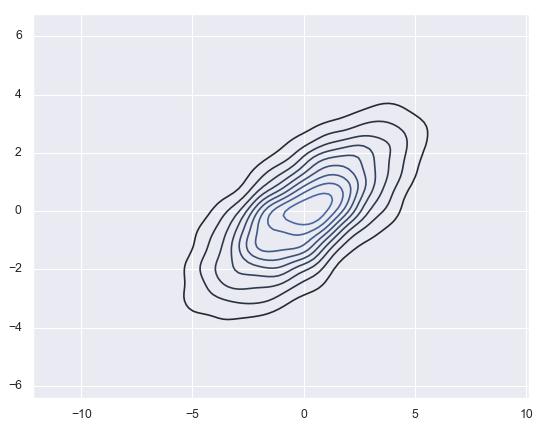

In [10]:
sns.kdeplot(data);

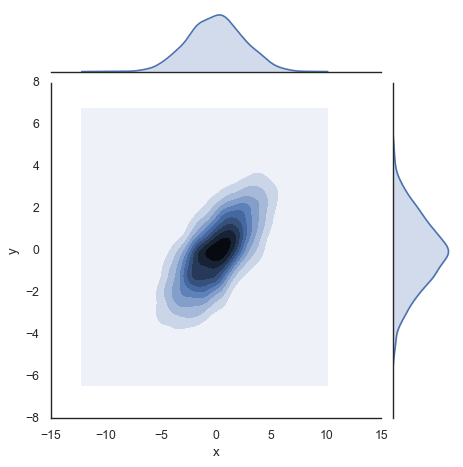

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

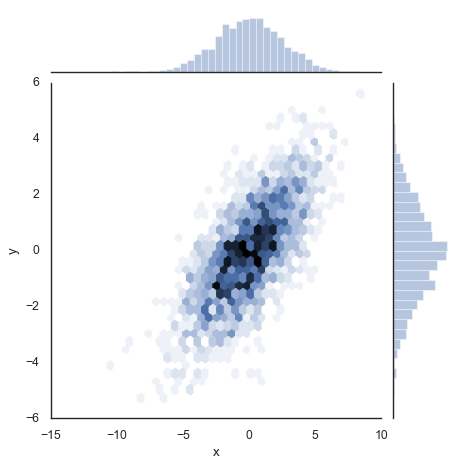

In [12]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

In [13]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


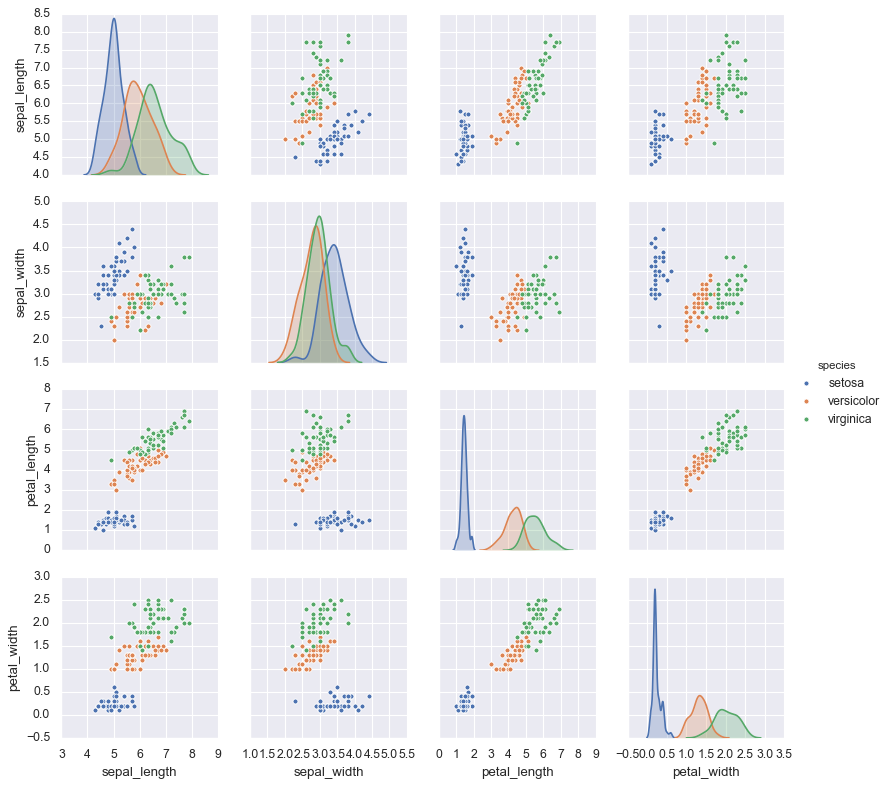

In [14]:
sns.pairplot(iris, hue='species', size=2.5)

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


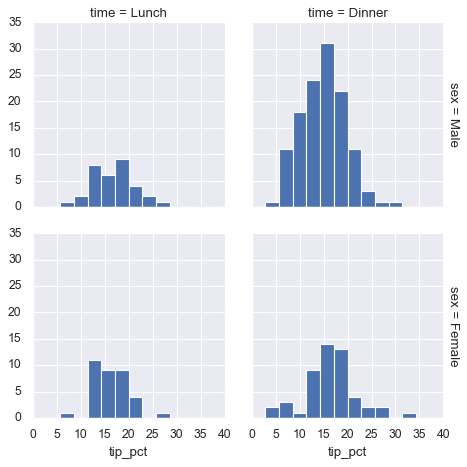

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col= "time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


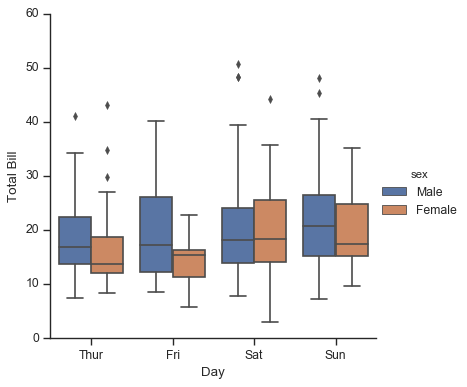

In [17]:
with sns.axes_style(style="ticks"):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

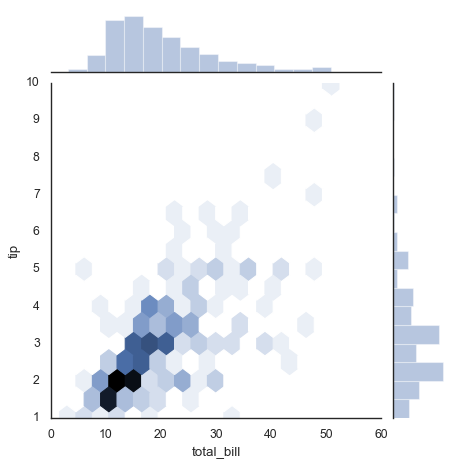

In [18]:
with sns.axes_style("white"):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")

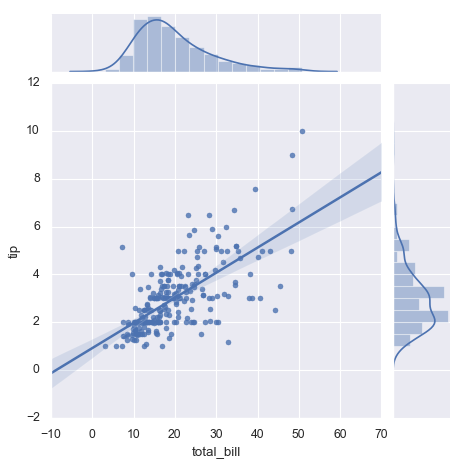

In [19]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

In [20]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


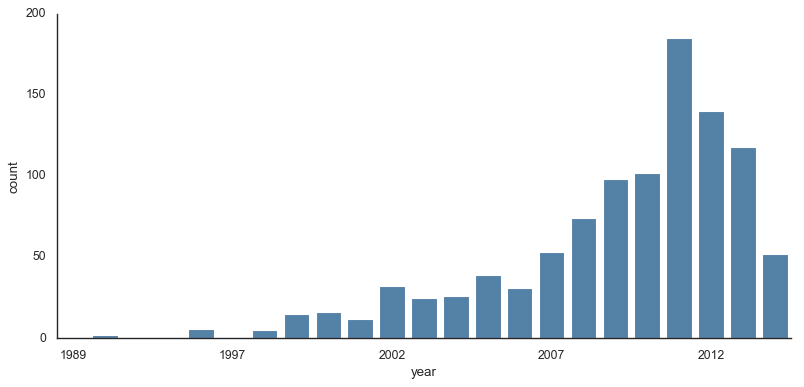

In [21]:
with sns.axes_style("white"):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


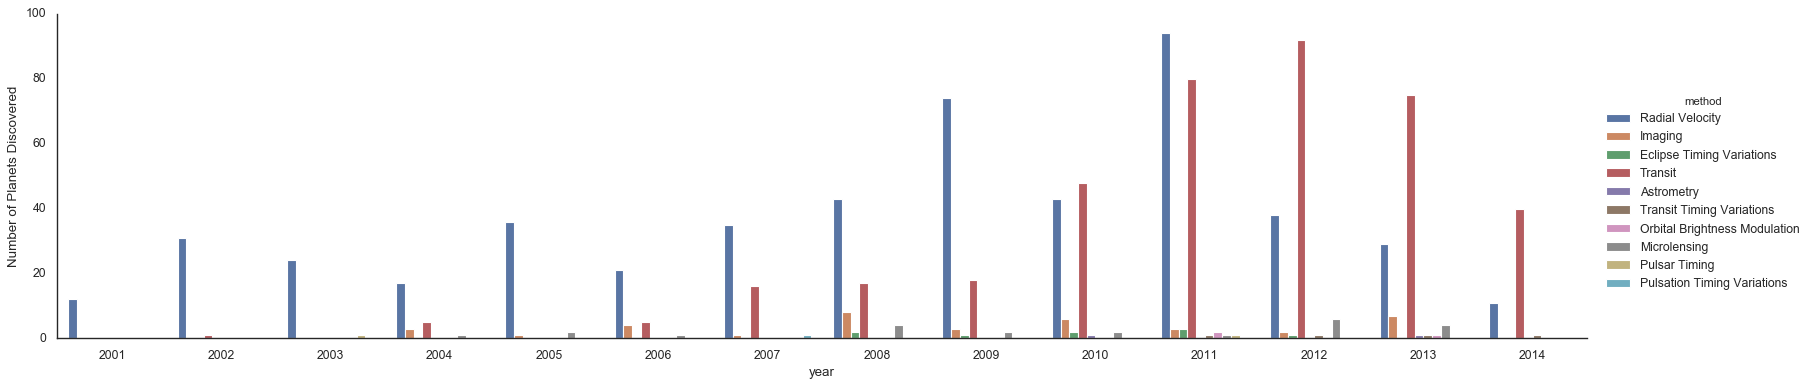

In [22]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind="count", hue="method", order=range(2001, 2015))
    g.set_ylabels("Number of Planets Discovered")

(0, 30.0)

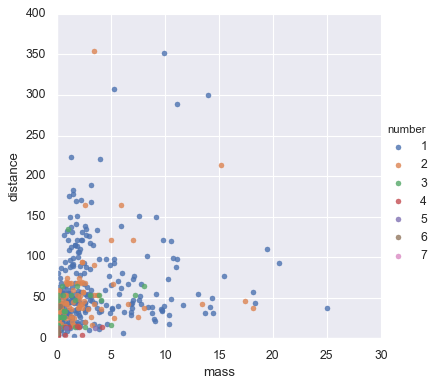

In [32]:
sns.lmplot(x='mass', y='distance', data=planets,
           fit_reg=False, # No regression line
           hue='number') 

plt.ylim(0, None)
plt.xlim(0, None)

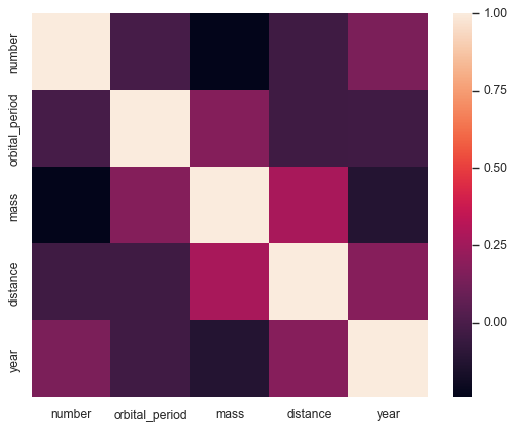

In [33]:

# Calculate correlations
corr = planets.corr()
 
# Heatmap
sns.heatmap(corr)